# **IMPORTACION DE LA DATA Y LIBRERIAS**

In [1]:
#IMPORTANDO LIBRERIAS

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)

In [2]:
# .env
import os
from dotenv import load_dotenv

# Redshift
import psycopg2
from sqlalchemy import create_engine, text

In [3]:
load_dotenv('../.env')
aws_redshift = os.getenv('aws_redshift')

# **EXPLORACION DE DATOS**

In [4]:
query = "SELECT * FROM public.data"

engine = create_engine(aws_redshift)
df = pd.read_sql_query(query, engine)

df.head()

,amt_income_total,amt_credt,name_income,name_education,term_month,cnt_childre,age,target
0,180000.0,379008.0,Commercial associate,Higher education,28,0,41,0
1,112500.0,202500.0,Pensioner,Secondary / secondary special,13,0,57,0
2,139500.0,222768.0,Working,Secondary / secondary special,4,1,63,0
3,270000.0,1316155.0,Commercial associate,Secondary / secondary special,3,0,27,0
4,315000.0,1546020.0,Pensioner,Higher education,15,0,58,0


In [5]:
#REVISANDO EL TAMAÑO DEL DATAFRAME
df.shape

(307511, 8)

In [6]:
#SABER LA CANTIDAD DE VALORES NULOS POR COLUMNA
df.isnull().sum()

amt_income_total    0
amt_credt           0
name_income         0
name_education      0
term_month          0
cnt_childre         0
age                 0
target              0
dtype: int64

In [7]:
#SABER EL PORCENTAJE DE VALORES NULOS POR COLUMNA
round(((df.isnull().sum() / len(df))*100),2)

amt_income_total    0.0
amt_credt           0.0
name_income         0.0
name_education      0.0
term_month          0.0
cnt_childre         0.0
age                 0.0
target              0.0
dtype: float64

In [8]:
#SABER EL TIPO DE DATOS DE CADA COLUMNA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   amt_income_total  307511 non-null  float64
 1   amt_credt         307511 non-null  float64
 2   name_income       307511 non-null  object 
 3   name_education    307511 non-null  object 
 4   term_month        307511 non-null  int64  
 5   cnt_childre       307511 non-null  int64  
 6   age               307511 non-null  int64  
 7   target            307511 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 18.8+ MB


In [9]:
df.name_income.unique()

array(['Commercial associate', 'Pensioner', 'Working', 'State servant',
       'Unemployed', 'Student', 'Maternity leave', 'Businessman'],
      dtype=object)

In [10]:
df.name_education.unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

# **PREPARACION DE DATOS**

In [11]:
#ELIMINANDO LAS COLUMNAS QUE TIENEN VALORES NULOS MAYOR AL 50%
df = df.dropna(thresh = (len(df)*0.50), axis=1)

In [12]:
#CAMBIANDO COLUMNAS CON TIPO OBJECT A VALORES CATEGORICOS
#for feature in df.columns: 
#    if df[feature].dtype == 'object': 
#        df[feature] = pd.Categorical(df[feature]).codes

df['name_income'].replace(['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
df['name_education'].replace(['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special'], [1, 2, 3, 4, 5], inplace=True)

In [13]:
df.head()

,amt_income_total,amt_credt,name_income,name_education,term_month,cnt_childre,age,target
0,180000.0,379008.0,2,2,28,0,41,0
1,112500.0,202500.0,4,5,13,0,57,0
2,139500.0,222768.0,8,5,4,1,63,0
3,270000.0,1316155.0,2,5,3,0,27,0
4,315000.0,1546020.0,4,2,15,0,58,0


In [14]:
#SABER EL TIPO DE DATOS DE CADA COLUMNA LUEGO DEL CAMBIO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   amt_income_total  307511 non-null  float64
 1   amt_credt         307511 non-null  float64
 2   name_income       307511 non-null  int64  
 3   name_education    307511 non-null  int64  
 4   term_month        307511 non-null  int64  
 5   cnt_childre       307511 non-null  int64  
 6   age               307511 non-null  int64  
 7   target            307511 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 18.8 MB


# **ANALISIS EXPLORATORIO**

Informes de valores atípicos para variables continuas

In [15]:
def df_boxplot_outlier(var_cont):
    
    plt.figure(figsize=(12,6))
    
    sns.boxplot(y=var_cont, data=df, palette='Spectral')
    plt.title('Distribucion de '+ '%s' %var_cont, weight='bold', fontsize=10)
    plt.xlabel(var_cont)
    plt.xticks(rotation=90)
    plt.ylabel('Numero de casos')
    
    plt.show()

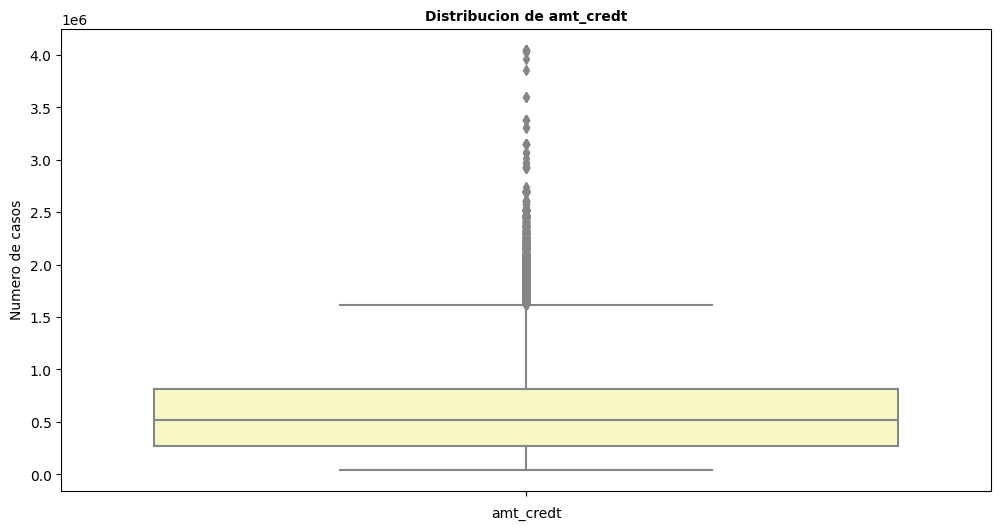

In [16]:
#CANTIDAD DE FAMILIARES
df_boxplot_outlier('amt_credt')

In [17]:
#SABER EL PORCENTAJE DE VALORES NULOS POR COLUMNA
round(100*(df.isnull().sum()/len(df)),2)

amt_income_total    0.0
amt_credt           0.0
name_income         0.0
name_education      0.0
term_month          0.0
cnt_childre         0.0
age                 0.0
target              0.0
dtype: float64

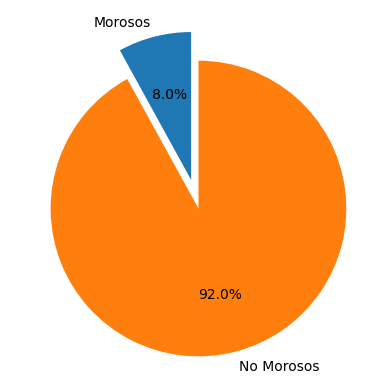

In [18]:
#REVISANDO EL DESBALANCE DE DATOS PARA LA COLUMNA TARGET
Defaulter = round((df['target'].value_counts()[1]/len(df)),2)
Non_Defaulter = round((df['target'].value_counts()[0]/len(df)),2)
explode= (0.1,0.1)
client = [Defaulter, Non_Defaulter]
labels = 'Morosos', 'No Morosos'
plt.pie(client, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.show()

In [19]:
df0 = df[df.target==0] #dataset para clientes no morosos
df1 = df[df.target==1] #dataset para clientes morosos

Características categóricas univariadas

In [20]:
def df_plot_unnivariate_cat(var):
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=df0, palette= 'Spectral', order= df0[var].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var +' para no morosos', weight='bold', fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Numero de casos para clientes no morosos')
    
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=df1, palette='Spectral', order= df1[var].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var +' para morosos', weight='bold',fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Numero de casos para clientes morosos')
    
    plt.show()

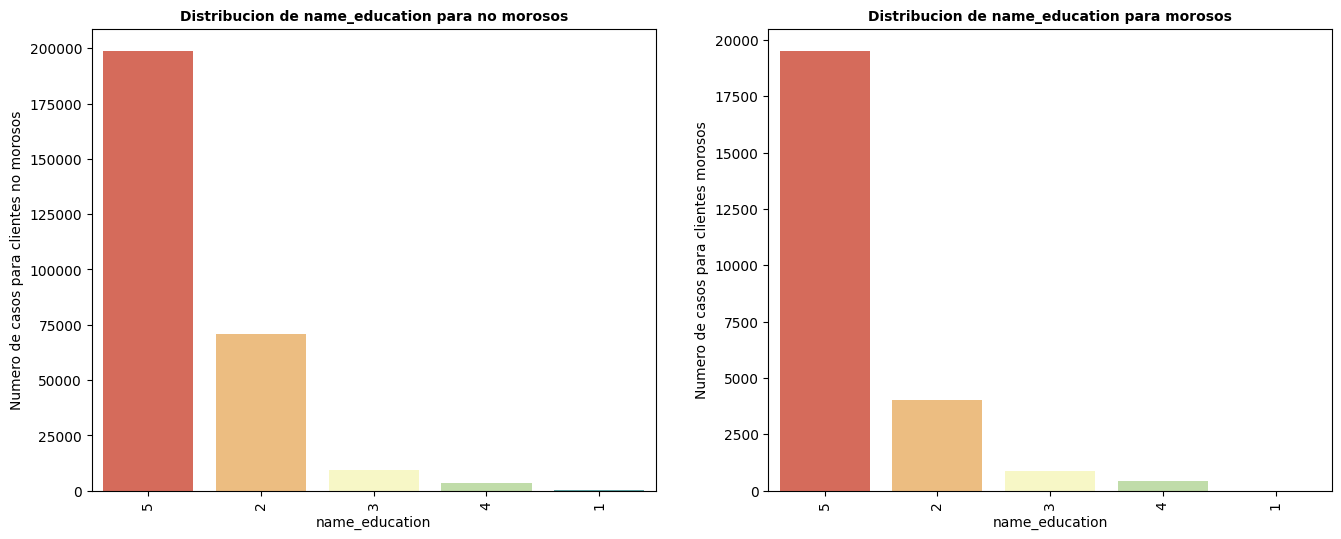

In [21]:
#NOMBRE DE TIPO DE CONTRATO
df_plot_unnivariate_cat('name_education')

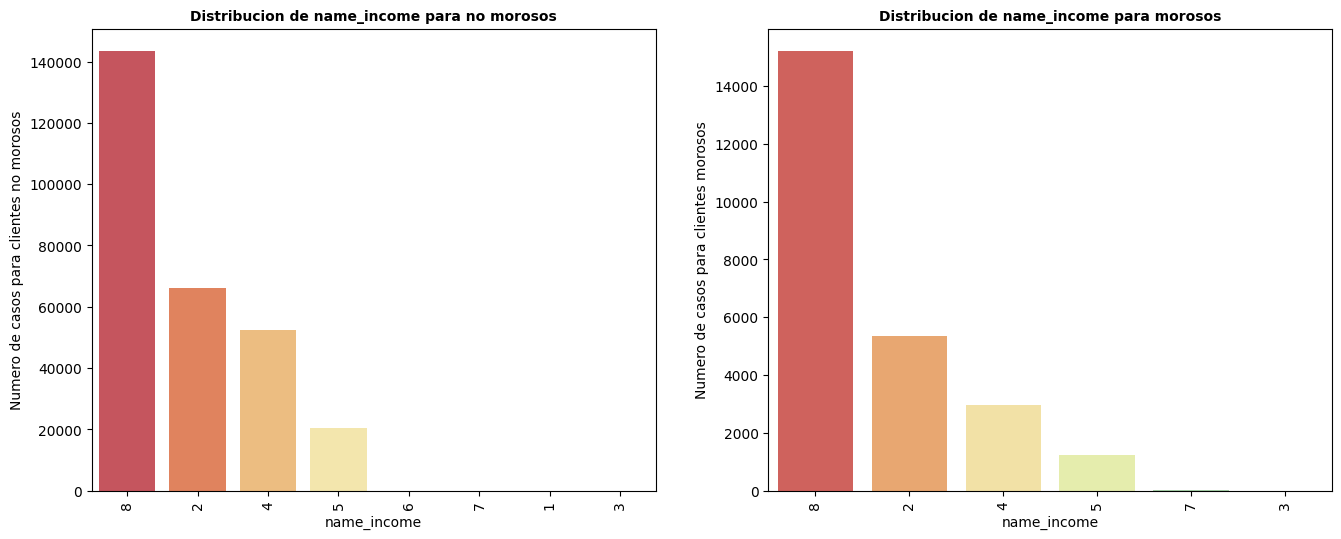

In [22]:
#TIPO DE EDUCACION
df_plot_unnivariate_cat('name_income')

CARACTERISTICAS CONTINUAS UNIVARIADAS

In [23]:
def df_plot_unnivariate_cont(var):
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1, 2, 1)
    sns.distplot(df0[var],color='tab:orange')
    plt.title('Distribucion de '+ '%s' %var +' para no morosos', weight='bold', fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Distribución normal para clientes no morosos')
    
    plt.subplot(1, 2, 2)
    sns.distplot(df1[var],color='tab:orange')
    plt.title('Distribution of '+ '%s' %var +' para morosos', weight='bold',fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Distribución normal para clientes morosos')
    
    plt.show()

Bivariado Categórico-Categórico

In [24]:
def df_plot_bivariate_cat_cat(var,var_hue):
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(var,hue=var_hue, data=df0, palette= 'Spectral', order= df0[var].value_counts().index, hue_order=df0[var_hue].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var +' para no morosos', weight='bold', fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Número de casos de clientes no morosos')
    
    plt.subplot(1, 2, 2)
    sns.countplot(var, hue=var_hue, data=df1, palette='Spectral', order= df1[var].value_counts().index, hue_order=df1[var_hue].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var +' para morosos', weight='bold',fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Número de casos de clientes morosos')
    
    plt.show()

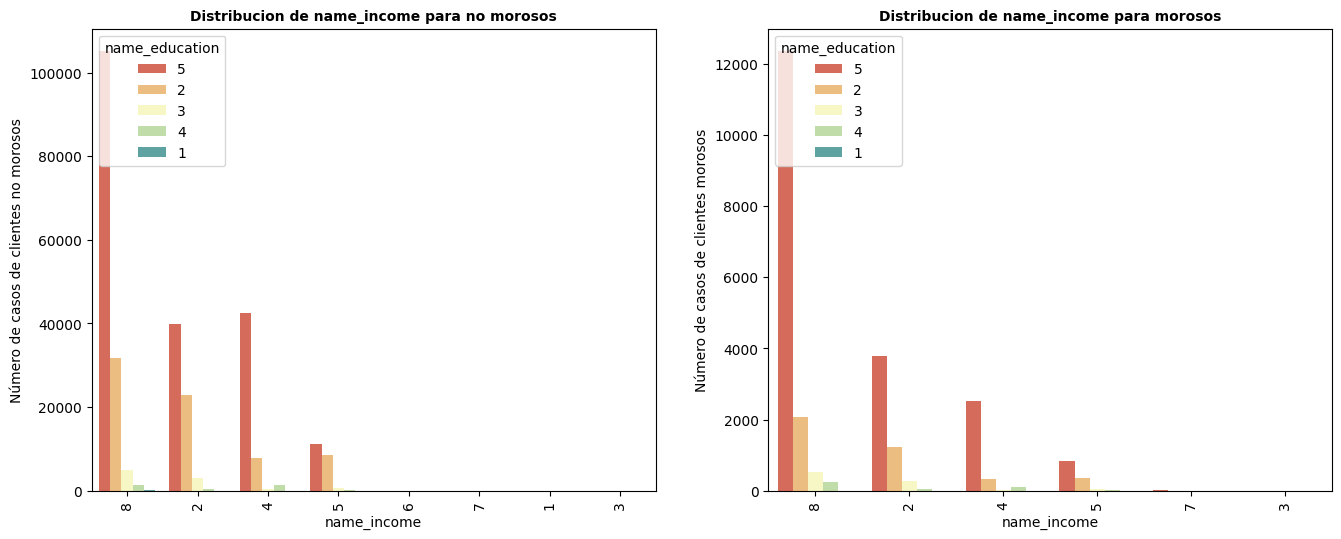

In [25]:
#ESTADO DE LA FAMILIA Y TIPO DE EDUCACION
df_plot_bivariate_cat_cat('name_income','name_education')

Bivariado Categórico-Continuo

In [26]:
def df_plot_bivariate_cat_cont(var_cat,var_cont):
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=var_cat,y=var_cont, data=df0, palette='Spectral', order= df0[var_cat].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var_cat +' para no morosos', weight='bold', fontsize=10)
    plt.xlabel(var_cat)
    plt.xticks(rotation=90)
    plt.ylabel('%s' %var_cont+' para clientes morosos')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=var_cat, y=var_cont, data=df1, palette='Spectral', order= df1[var_cat].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var_cat +' para morosos', weight='bold',fontsize=10)
    plt.xlabel(var_cat)
    plt.xticks(rotation=90)
    plt.ylabel('%s' %var_cont+' para clientes morosos')
    
    plt.show()

Bivariado Continuo-Continuo

In [27]:
def df_plot_bivariate_cont_cont(var_cont1,var_cont2):
    
    plt.figure(figsize=(18,6))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var_cont1,y=var_cont2, data=df0, palette='Spectral')
    plt.title('Distribucion de '+ '%s' %var_cont1 +' para no morosos', weight='bold', fontsize=10)
    plt.xticks(rotation=90)
    plt.ylabel('Distribucion de '+ '%s' %var_cont2)

    xIQR=1.5*(df0[var_cont1].quantile(.75)-df0[var_cont1].quantile(.25))
    xlowerlim=df0[var_cont1].quantile(.25)-xIQR
    xupperlim=df0[var_cont1].quantile(.75)+xIQR

    yIQR=1.5*(df0[var_cont2].quantile(.75)-df0[var_cont2].quantile(.25))
    ylowerlim=df0[var_cont2].quantile(.25)-yIQR
    yupperlim=df0[var_cont2].quantile(.75)+yIQR

    plt.ylim(ylowerlim,yupperlim)
    plt.xlim(xlowerlim,xupperlim)
    
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=var_cont1,y=var_cont2, data=df1, palette='Spectral')
    plt.title('Distribucion de '+ '%s' %var_cont1 +' para morosos', weight='bold',fontsize=10)

    plt.xticks(rotation=90)
    plt.ylabel('Distribucion de '+ '%s' %var_cont2)

    xIQR=1.5*(df1[var_cont1].quantile(.75)-df1[var_cont1].quantile(.25))
    xlowerlim=df1[var_cont1].quantile(.25)-xIQR
    xupperlim=df1[var_cont1].quantile(.75)+xIQR

    yIQR=1.5*(df1[var_cont2].quantile(.75)-df1[var_cont2].quantile(.25))
    ylowerlim=df1[var_cont2].quantile(.25)-yIQR
    yupperlim=df1[var_cont2].quantile(.75)+yIQR
    
    plt.ylim(ylowerlim,yupperlim)
    plt.xlim(xlowerlim,xupperlim)
    
    plt.show()

Correlacion (APLICATION DATA SET)

In [28]:
def correlation_heatmap(var):
    plt.figure(figsize=(12,8))
    cor = var.corr()

    sns.heatmap(cor,annot=True,linewidths=.5,cbar_kws={"orientation": "horizontal"},cmap="Reds")
    plt.show()

    indices = np.where(cor > -1)
    indices = [(cor.index[x], cor.columns[y],abs(cor.iloc[x,y])) for x, y in zip(*indices) if x != y and x < y]
    a=sorted(indices, key=lambda x: x[2],reverse=True)
    print("Las 5 principales correlaciones son:")
    for i in range(0,5):
        print('%d. '%(i+1)+a[i][0]+' and '+a[i][1])

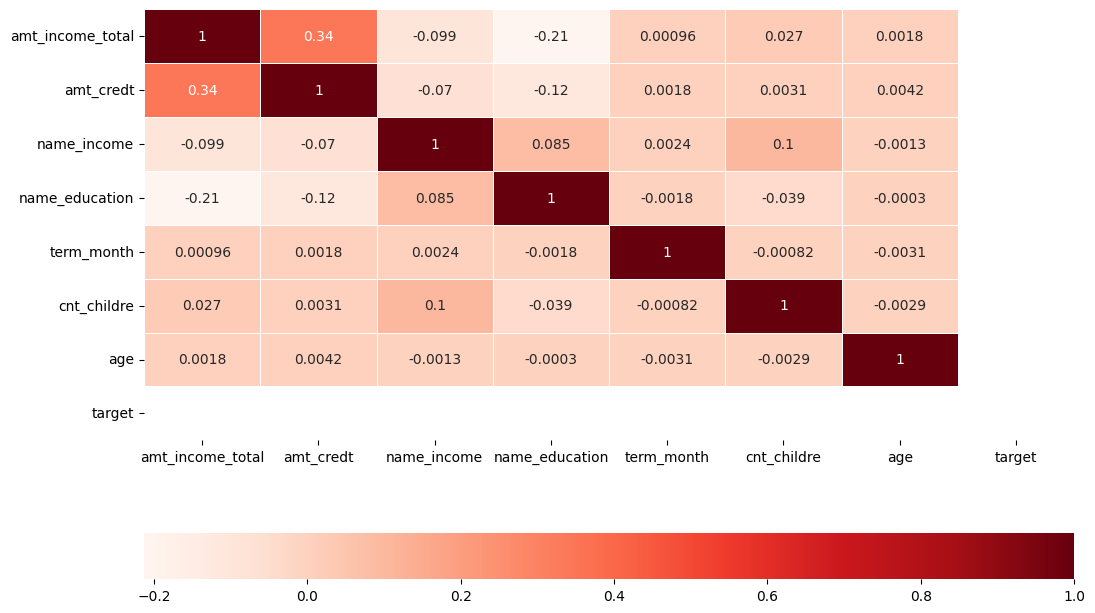

Las 5 principales correlaciones son:
1. amt_income_total and amt_credt
2. amt_income_total and name_education
3. amt_credt and name_education
4. name_income and cnt_childre
5. amt_income_total and name_income


In [29]:
#MATRIZ DE CORRELACION PARA NO MOROSOS
correlation_heatmap(df0[['amt_income_total','amt_credt','name_income','name_education','term_month','cnt_childre','age','target']])

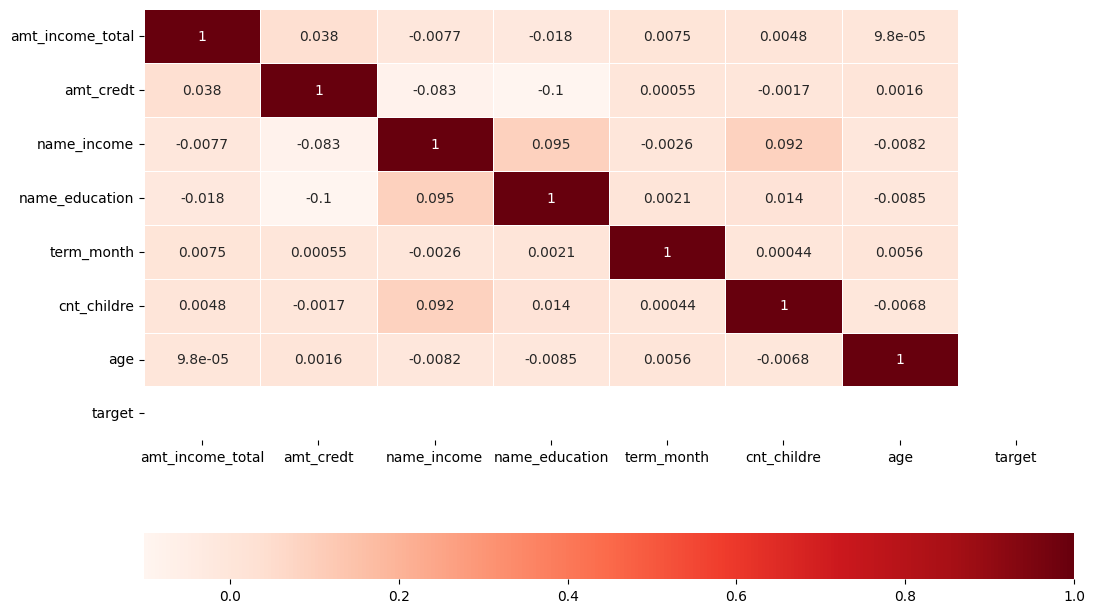

Las 5 principales correlaciones son:
1. amt_credt and name_education
2. name_income and name_education
3. name_income and cnt_childre
4. amt_credt and name_income
5. amt_income_total and amt_credt


In [30]:
#MATRIZ DE CORRELACION PARA MOROSOS
correlation_heatmap(df1[['amt_income_total','amt_credt','name_income','name_education','term_month','cnt_childre','age','target']])

En relacion de nuestra matriz correlación pasaremos a modelar nuestra data.

# **MODELADO**

In [31]:

y = df.target.copy()
X = df.drop(['target'], axis=1)

In [32]:
#DIVIDIMOS EL CONJUNTO DE ENTRENAMIENTO Y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [33]:
X_train

,amt_income_total,amt_credt,name_income,name_education,term_month,cnt_childre,age
240610,202500.0,675000.0,8,5,6,2,56
91527,202500.0,2517300.0,8,2,7,0,31
247813,135000.0,1611072.0,5,2,2,1,48
1679,189000.0,957033.0,8,2,19,1,36
3771,135000.0,450000.0,8,2,3,0,27
...,...,...,...,...,...,...,...
192476,90000.0,61263.0,8,2,23,0,44
17730,153000.0,573628.0,8,2,6,0,53
28030,270000.0,526491.0,2,2,25,0,52
277869,225000.0,810000.0,8,5,14,1,44


In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230633 entries, 240610 to 249342
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   amt_income_total  230633 non-null  float64
 1   amt_credt         230633 non-null  float64
 2   name_income       230633 non-null  int64  
 3   name_education    230633 non-null  int64  
 4   term_month        230633 non-null  int64  
 5   cnt_childre       230633 non-null  int64  
 6   age               230633 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 14.1 MB


In [35]:
X_test

,amt_income_total,amt_credt,name_income,name_education,term_month,cnt_childre,age
58296,238500.0,1236816.0,5,5,8,0,69
286459,157500.0,450000.0,8,5,27,1,47
81217,180000.0,545040.0,8,5,3,0,22
102593,112500.0,227520.0,8,5,5,0,50
38837,135000.0,450000.0,8,5,26,1,55
...,...,...,...,...,...,...,...
117905,112500.0,728460.0,8,5,21,0,64
63987,135000.0,863226.0,8,2,23,1,41
170652,180000.0,938304.0,5,2,13,0,24
137633,180000.0,1125000.0,5,5,2,0,69


MODELO DE REGRESION LOGISTICA

In [36]:
#ENTRENAMOS LOS DATOS SEGUN EL MODELO DE REGRESION LOGISTICA
modelRegression = LogisticRegression(solver='liblinear')
modelRegression.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [37]:
#PRECIDIENDO CON EL MODELO PREVIAMENTE ENTRENADO
y_predict = modelRegression.predict(X_test)

In [38]:
#CALCULANDO ALGUNAS METRICAS


results_df = pd.DataFrame(data=[["Regresion Logistica",  metrics.accuracy_score(y_test, y_predict), metrics.precision_score(y_test, y_predict),metrics.recall_score(y_test, y_predict) ]], 
                          columns=['Modelo', 'Accuracy', 'Precision', 'Recall'])
results_df

,Modelo,Accuracy,Precision,Recall
0,Regresion Logistica,0.921031,0.0,0.0


In [39]:
#MATRIZ DE CONFUSION
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
print(cnf_matrix)

[[70807     0]
 [ 6071     0]]


Text(0.5, 23.52222222222222, 'Predicted')

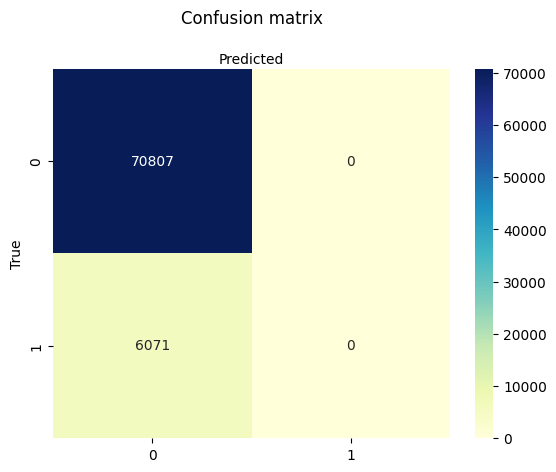

In [40]:
#CREANDO GRAFICA DE MATRIZ DE CONFUSION
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

MODELO DE ANALISIS DISCRIMINANTE

In [41]:
#ENTRENAMOS LOS DATOS SEGUN EL MODELO DE ANALISIS DISCRIMINANTE
modelDiscriminant = LinearDiscriminantAnalysis()
modelDiscriminant.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [42]:
#PRECIDIENDO CON EL MODELO PREVIAMENTE ENTRENADO
y_predict = modelDiscriminant.predict(X_test)

In [43]:
#CALCULANDO ALGUNAS METRICAS

results_df_2 = pd.DataFrame(data=[["Analisis Discriminante",  metrics.accuracy_score(y_test, y_predict), metrics.precision_score(y_test, y_predict),metrics.recall_score(y_test, y_predict) ]], 
                          columns=['Modelo', 'Accuracy', 'Precision', 'Recall'])
results_df_2

,Modelo,Accuracy,Precision,Recall
0,Analisis Discriminante,0.921031,0.0,0.0


In [44]:
#MATRIZ DE CONFUSION
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
print(cnf_matrix)

[[70807     0]
 [ 6071     0]]


Text(0.5, 23.52222222222222, 'Predicted')

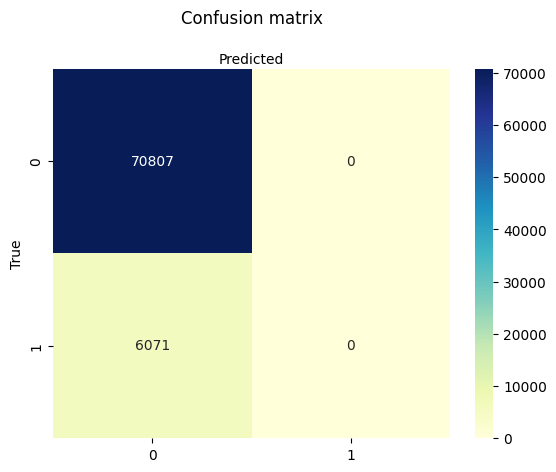

In [45]:
#CREANDO GRAFICA DE MATRIZ DE CONFUSION
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# **COMPARACION DE LOS 2 MODELOS**

In [46]:
# Cuadro Comparativo
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Modelo,Accuracy,Precision,Recall
0,Regresion Logistica,0.921031,0.0,0.0
1,Analisis Discriminante,0.921031,0.0,0.0


# **Conclusiones**

En base a los objetivos planteados en el proyecto se llegaron a las siguientes conclusiones:

1.   De la data obtenida con 122 características para determinar los clientes morosos del banco el 33% de sus características no fueron utilizadas ya que se realizó un análisis exploratorio de los datos y se procedió a tratarlos, ya que se halló varias características con el 50% de sus campos nulos; al terminar con el tratamiento de los datos quedaron 82 características útiles para determinar el objetivo de nuestro proyecto.

2.   Se realizó un análisis exploratorio exhaustivo a la data obtenida del banco que nos arrojó como resultado final 82 características con todos sus campos completos y categorizados listos para ser utilizados en los modelos de regresión logística y análisis de discriminante planteadas para el proyecto.

3. Se determinaron los modelos de regresión logística y análisis de discriminante para el presente proyecto con el objeto de predecir los posibles clientes morosos que puede tener el banco, para esto se dividió la data tratada con sus 82 características útiles de tal forma que un 25% se utilice para probar el modelo entrenado y un 75% para entrenar el modelo.

4. Se entrenaron los modelos de regresión logística y discriminante con el 75% de los datos útiles para determinar a los posibles clientes morosos obteniendo resultados poco coherentes con el modelo de regresión logística ya que nos arrojaba cero para las métricas de precision y recall mientras que el modelo de análisis discriminante nos arrojaba métricas más reales.

5. Al entrenar los dos modelos de predicción planteados en el proyecto se obtuvieron como resultados para el caso de la regresión logistica 0,918455 de accuaracy, 0 de precision y 0 de recall mientras que para el modelo de análisis discriminante se obtuvo 0,918338 de accuaracy, 0,481328 de precision y 0,018504 de recall, concluyendo así que el mejor modelo para nuestra predicción es el de análisis discriminante.

6. Después de identificar nuestro mejor modelo de predicción para nuestro proyecto, se realizó la matriz de confusión para el modelo de análisis discriminante obteniendo como resultados 70484 de verdaderos negativos (clientes no morosos), 125 falsos positivos (clientes no morosos), 6153 de falsos negativos (clientes morosos) y 116 verdaderos positivos (clientes morosos).